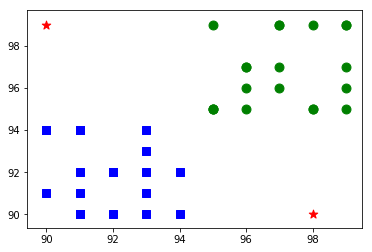

[[98. 90.]
 [90. 99.]]
[[0.]
 [0.]]


In [2]:
%matplotlib inline
#已知老员工的笔试成绩、面试成绩及对应的等级表现，根据新员工的笔试成绩和面试成绩预测其可能的表现
#=============================1. 生成模拟数据===============================###
import cv2
import numpy as np
import matplotlib.pyplot as plt
#首先生成20组入职一年后变现为A级的员工入职时笔试和面试成绩，成绩均分布在[95,100)区间的数据对
a=np.random.randint(95,100,(20,2)).astype(np.float32)
#然后生成20组入职一年后变现为B级的员工入职时笔试和面试成绩，成绩均分布在[90,95)区间的数据对
b=np.random.randint(90,95,(20,2)).astype(np.float32)
#将两组数据合并，并使用numpy.array对其进行类型转换：
data=np.vstack((a,b))
data=np.array(data,dtype="float32")
#============================2. 构造分组标签================================###
#首先对表现为A级的数据构造标签“0”：
alable=np.zeros((20,1))
#接下来对表现为B级的数据构造标签“1”：
blable=np.ones((20,1))
#将两组数据合并，并使用numpy.array对其进行类型转换：
label=np.vstack((alable,blable))
label=np.array(label,dtype="int32")
#===========================3. 训练=========================================###
svm=cv2.ml.SVM_create()
result=svm.train(data,cv2.ml.ROW_SAMPLE,label)
#============================4. 预测分类=====================================###
#生成测试数据
test=np.vstack([[98,90],[90,99]])
test=np.array(test,dtype="float32")
#然后使用函数svm.predict()对随机成绩分类
(p1,p2)=svm.predict(test)
#==========================5. 显示分类结果===================================###
#可视化
plt.scatter(a[:,0],a[:,1],80,"g","o")
plt.scatter(b[:,0],b[:,1],80,"b","s")
plt.scatter(test[:,0],test[:,1],80,"r","*")
plt.show()
#打印原始数据test,预测结果
print(test)
print(p2)